# Exercises (Optional)

These exercises are not required to complete however are good to do for practice. (Not to be submitted on git)

These exercises are a mix of Python and pandas/EDA practice. Most should be no more than a few lines of code! 

In [31]:
# here is a Python list:

a = [1, 2, 3, 4, 5, 6]

# get a list containing the last 3 elements of a
b = a[3: 6]
# reverse the list
b = b[::-1]
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
c = [e**2 for e in a]

In [32]:
# create a numpy array from this list
import numpy as np
b = np.array(a) # change this

In [33]:
# find the mean of b
mean_b = np.mean(b)
print(mean_b)

3.5


In [34]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
d = np.square(b)
print(d)

[ 1  4  9 16 25 36]


In [39]:
# change b from a length-6 list to a 2x3 matrix
b.resize((2,3))
print(b)

[[1 2 3]
 [4 5 6]]


In [41]:
# find the mean value of each row
b.mean(axis=1)

array([2., 5.])

In [47]:
# find the mean value of each column
b.mean(axis=0)

array([2.5, 3.5, 4.5])

In [48]:
# find the third column of b
b[:,2]

array([3, 6])

In [51]:
# load in the "starbucks.csv" dataset
import pandas as pd
data = pd.read_csv('../data/starbucks.csv')
data.head()

,beverage_category,beverage,beverage_prep,calories,total fat,trans fat,saturated fat,sodium,total carbohydrates,cholesterol,dietary fibre,sugars,protein,vitamin a,vitamin c,calcium,iron,caffeine
0,coffee,brewed coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0,0,0,0.0,175.0
1,coffee,brewed coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0,0,0,0.0,260.0
2,coffee,brewed coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,0,0.0,330.0
3,coffee,brewed coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0,0,2,0.0,410.0
4,classic espresso drinks,caff latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10,0,20,0.0,75.0


In [54]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
avg_cals = data["calories"].mean()
print("average calories across all items is: ", avg_cals)

average calories across all items is:  193.87190082644628


In [58]:
# how many different categories of beverages are there?
diff_cats = data["beverage_category"].unique()
print("diff categories of beverages: ", len(diff_cats))

diff categories of beverages:  9


In [96]:
# what is the average # calories for each beverage category?
for categ in diff_cats:
    print(f"average calories of {categ}: ", data[data["beverage_category"] == categ]["calories"].mean())

average calories of coffee:  4.25
average calories of classic espresso drinks:  140.17241379310346
average calories of signature espresso drinks:  250.0
average calories of tazo tea drinks:  177.30769230769232
average calories of shaken iced beverages:  114.44444444444444
average calories of smoothies:  282.22222222222223
average calories of frappuccino blended coffee:  276.94444444444446
average calories of frappuccino light blended coffee:  162.5
average calories of frappuccino blended crme:  233.07692307692307


In [83]:
# what beverage preparation includes the most sugar on average?
a = {}
for categ in diff_cats:
    a[categ] = data[data["beverage_category"] == categ]["sugars"].mean() 
a = {k: v for k, v in sorted(a.items(), key=lambda item: item[1], reverse=True)}
print(a)

# frapuccno blended coffee has the most sugar on average

{'frappuccino blended coffee': 57.083333333333336, 'frappuccino blended crme': 48.46153846153846, 'signature espresso drinks': 38.6, 'smoothies': 36.77777777777778, 'frappuccino light blended coffee': 32.416666666666664, 'tazo tea drinks': 30.307692307692307, 'shaken iced beverages': 26.0, 'classic espresso drinks': 16.96551724137931, 'coffee': 0.0}


In [97]:
# what is the average % daily value calcium content for each beverage?
for categ in diff_cats:
    print(f"average % calcium of {categ}: ", (data[data["beverage_category"] == categ]["calcium"].mean()))

average % calcium of coffee:  0.5
average % calcium of classic espresso drinks:  27.344827586206897
average % calcium of signature espresso drinks:  31.375
average % calcium of tazo tea drinks:  23.653846153846153
average % calcium of shaken iced beverages:  4.0
average % calcium of smoothies:  13.333333333333334
average % calcium of frappuccino blended coffee:  12.277777777777779
average % calcium of frappuccino light blended coffee:  11.333333333333334
average % calcium of frappuccino blended crme:  13.846153846153847


In [137]:
# It's bulking season. What drink should Naitian get so that he maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
# d = {}
# for categ in diff_cats:
#     print("\n", categ)
#     f = data[data["beverage_category"] == categ]
#     print(f"protein: ", f["protein"].sum())
#     print(f"calories: ", f["calories"].sum())

# # a = {k: v for k, v in sorted(a.items(), key=lambda item: item[1], reverse=True)}
# # print(d)

optimal_drink = (data['protein']-data['calories']).idxmax()
print(f"naitian should get ", data['beverage'][optimal_drink])

naitian should get  tazo tea


<AxesSubplot:xlabel='beverage', ylabel='calories'>

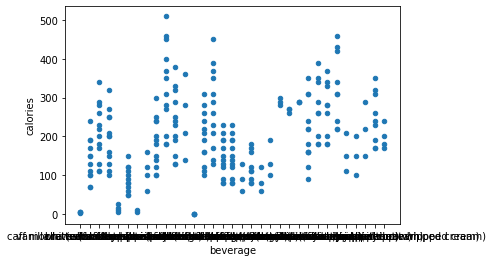

In [121]:
# plot the distribution of the number of calories in drinks using matplotlib
import matplotlib as plt
data.plot.scatter( x='beverage', y='calories')

<AxesSubplot:xlabel='beverage', ylabel='calories'>

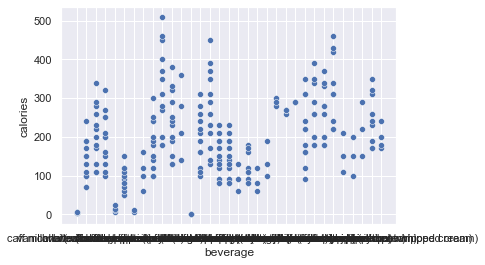

In [139]:
# plot the same distribution using seaborn. what about a density plot instead?
import seaborn as sns
sns.scatterplot(data=data, x='beverage', y='calories')

<AxesSubplot:xlabel='total fat', ylabel='calories'>

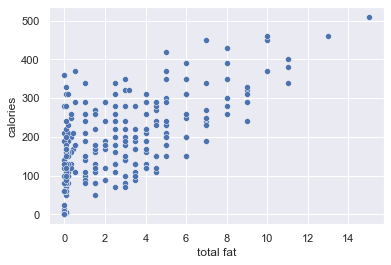

In [140]:
# plot calories against total fat using seaborn
sns.scatterplot(data=data, x='total fat', y='calories')

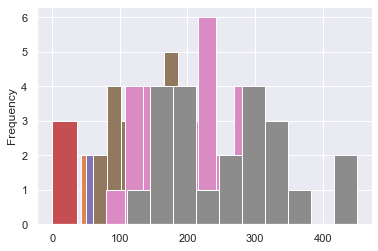

In [142]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
fets = ['Short', 'Tall', 'Grande', 'Venti', 'Short Nonfat Milk', 'Tall Nonfat Milk', 'Grande Nonfat Milk', 'Venti Nonfat Milk']
for fet in fets:
    data.loc[data['beverage_prep'] == fet]["calories"].plot.hist()